# CBLOF - Clustering Based Local Outlier Factor
### CBLOF takes as an input the data set and the cluster model that was generated by a clustering algorithm. It classifies the clusters into small clusters and large clusters using the parameters alpha and beta. The anomaly score is then calculated based on the size of the cluster the point belongs to as well as the distance to the nearest large cluster. 
### Use weighting for outlier factor based on the sizes of the clusters as proposed in the original publication. Since this might lead to unexpected behavior (outliers close to small clusters are not found), it is disabled by default.Outliers scores are solely computed based on their distance to the closest large cluster center.
### By default, kMeans is used for clustering algorithm instead of Squeezer algorithm mentioned in the original paper for multiple reasons.
source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof

### Arguments that work with CBLOF algorithm:
1. n_clusters
2. contamination
3. clustering_estimator
4. alpha
5. beta
6. use_weights
7. check_estimator
8. random_state
9. n_jobs

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=6, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   182.174018 seconds
image downsampling       ...took     6.436659 seconds
image downsampling       ...took    11.740647 seconds
image downsampling       ...took    25.745046 seconds
image downsampling       ...took    28.104940 seconds
image downsampling       ...took    42.300293 seconds
image downsampling       ...took    44.680722 seconds
image downsampling       ...took    50.107529 seconds
image downsampling       ...took    55.417471 seconds
image downsampling       ...took    60.717198 seconds
image downsampling       ...took    66.131741 seconds
image downsampling       ...took    68.482978 seconds
image downsampling       ...took    73.791573 seconds
image downsampling       ...took    79.104292 seconds
image downsampling       ...took    84.423760 seconds
image downsampling       ...took    98.662954 seconds
image downsampling       ...took   103.967246 seconds
image downsampling       ...took   106.334227 seconds
image downsampling       ...

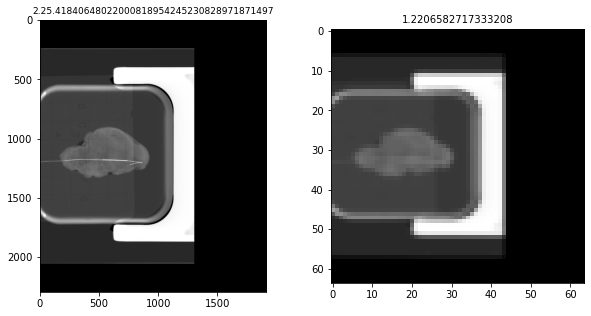

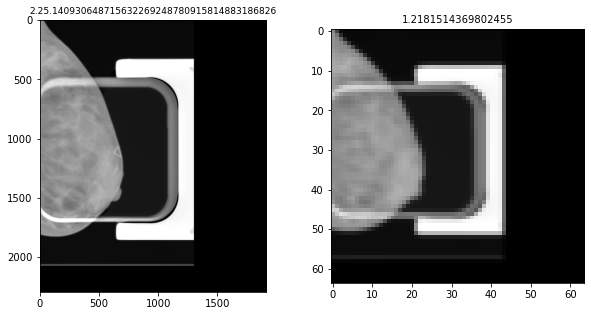

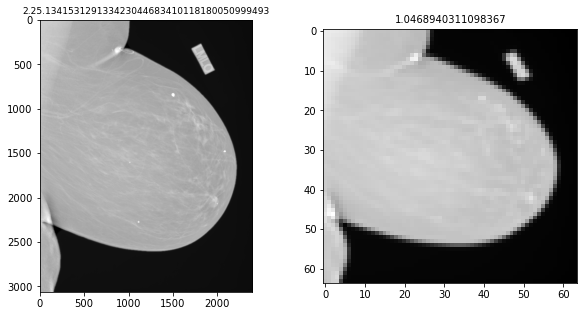

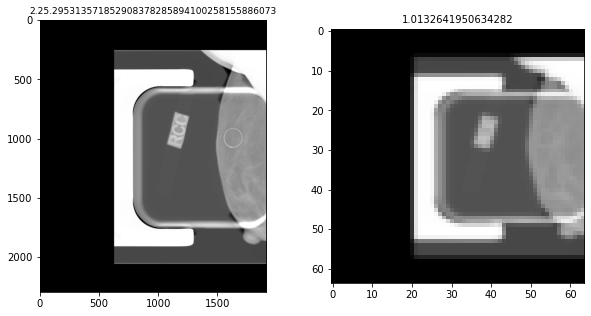

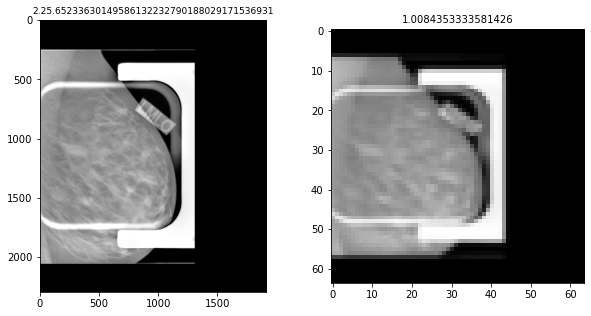

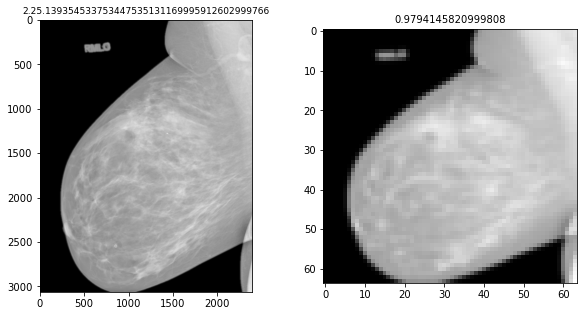

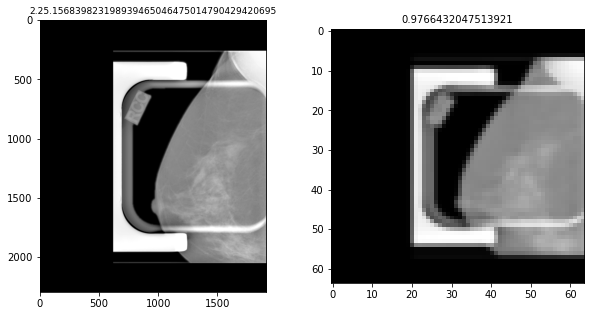

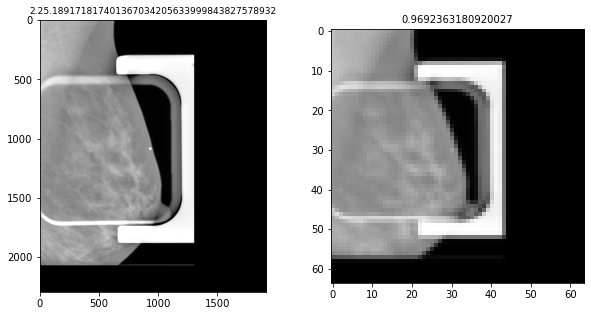

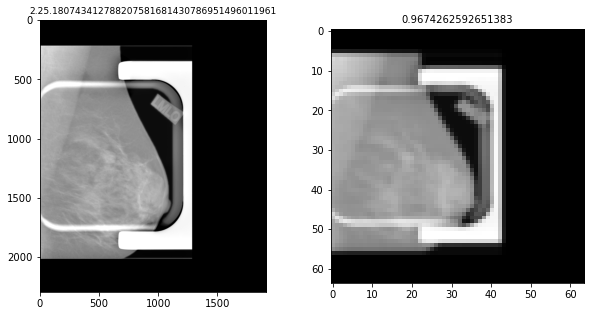

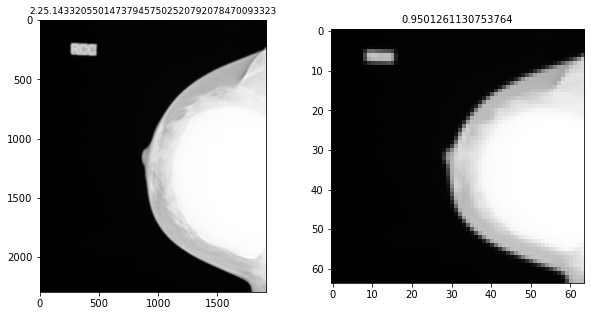

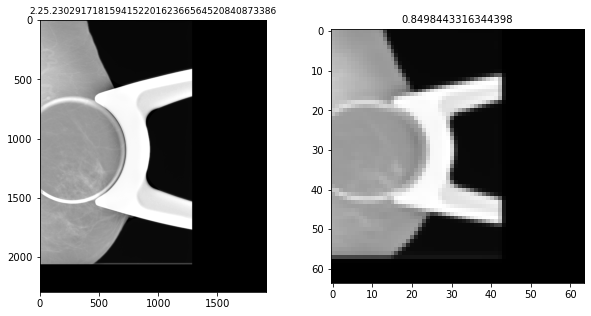

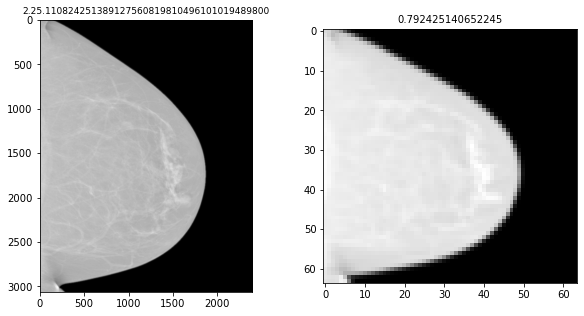

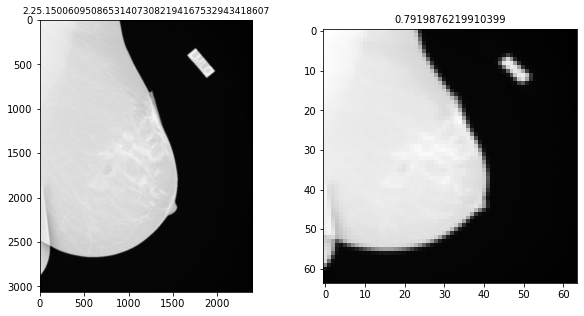

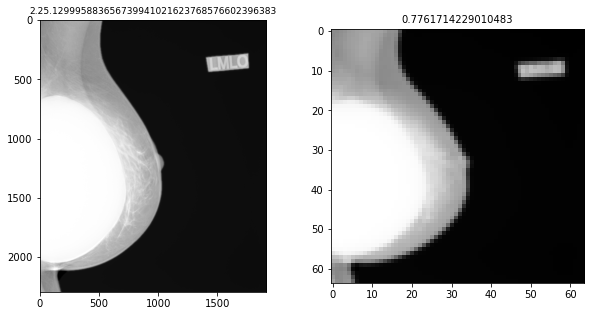

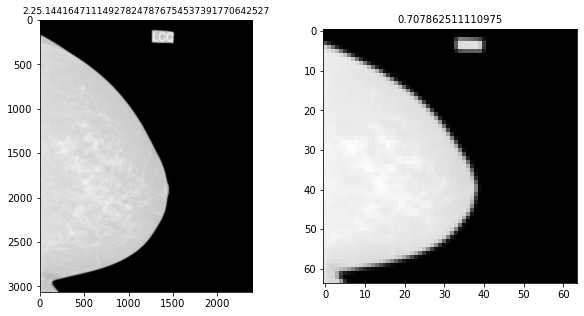

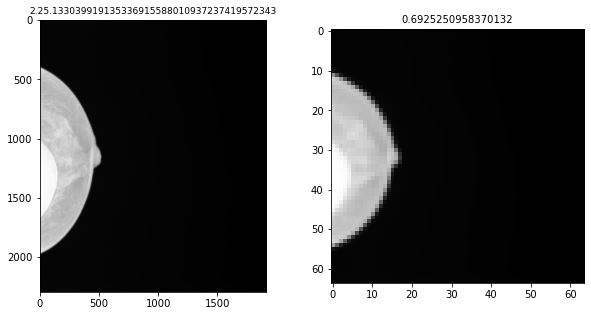

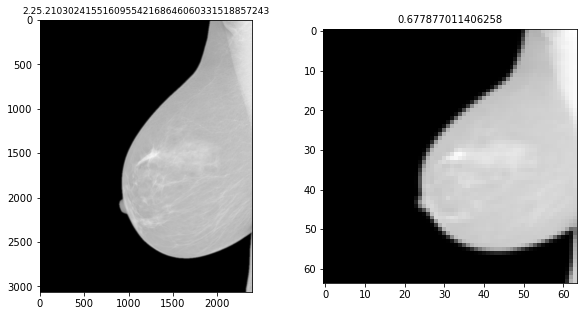

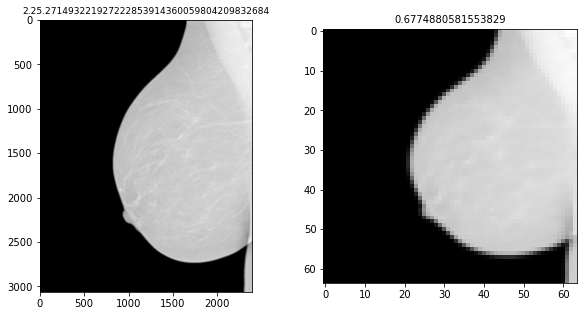

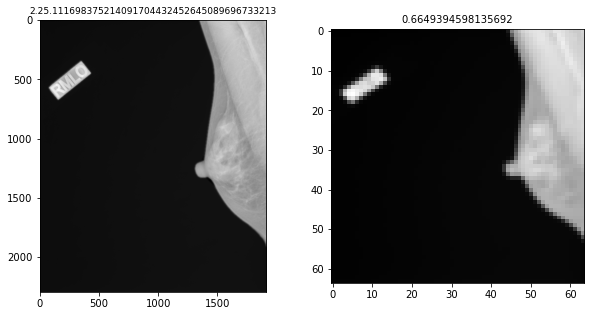

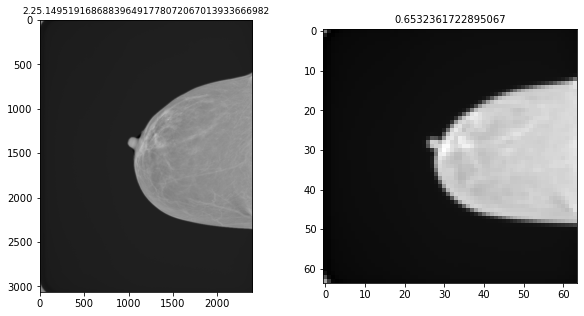

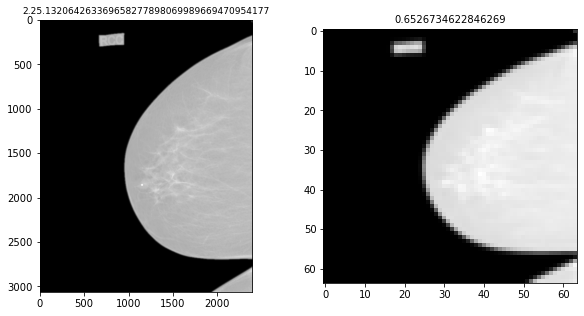

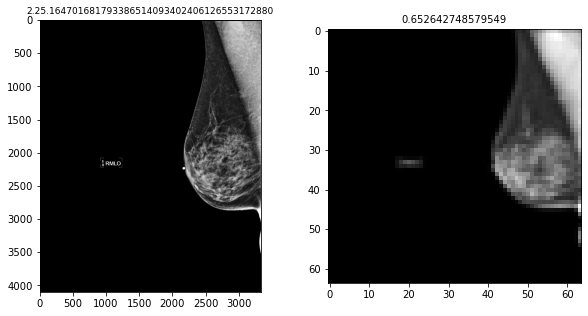

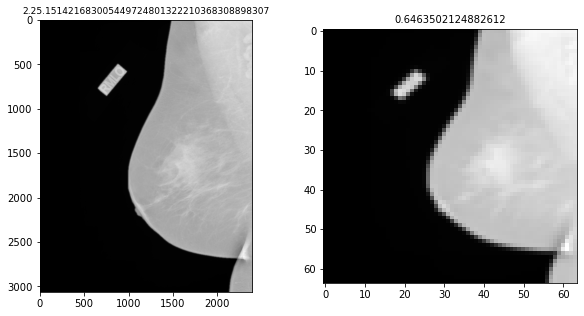

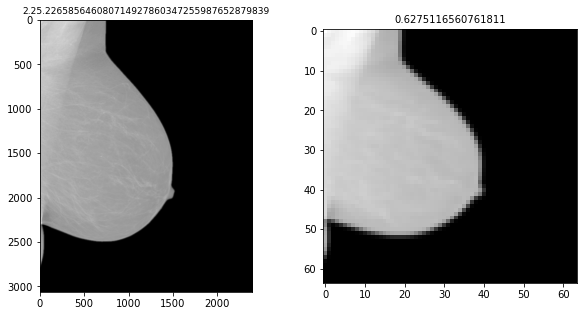

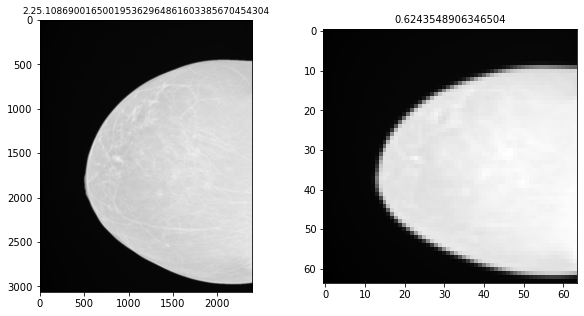

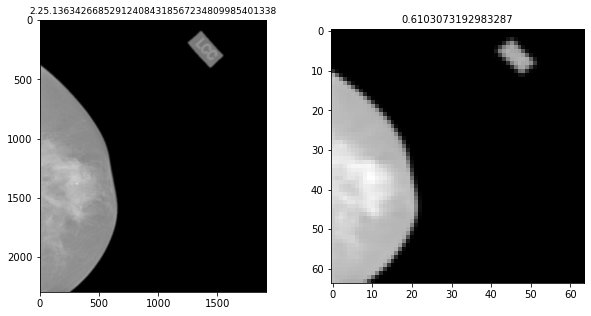

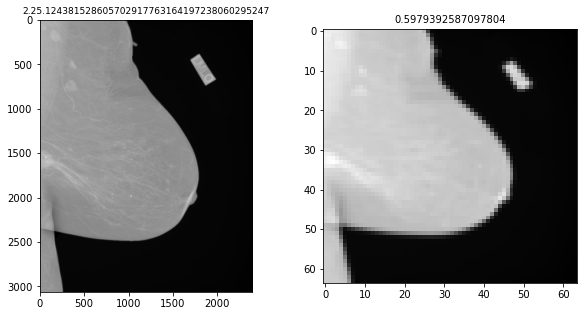

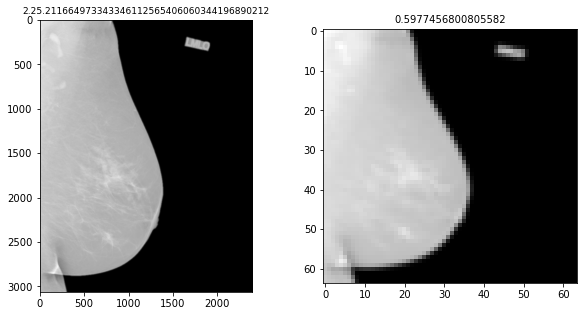

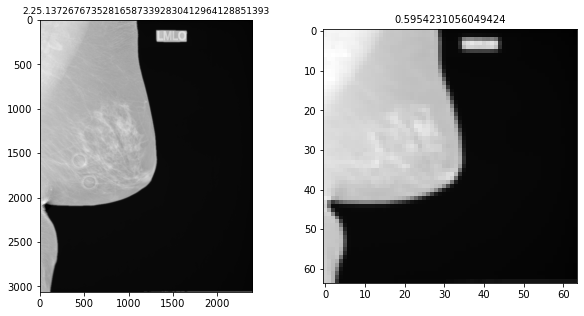

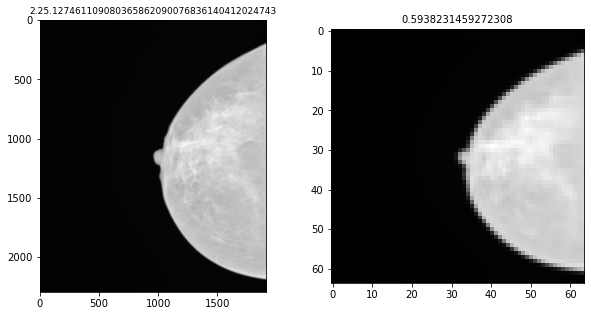

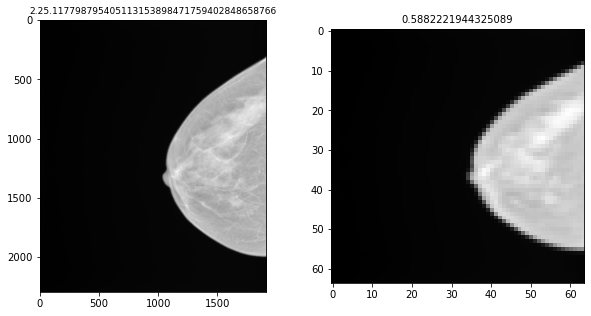

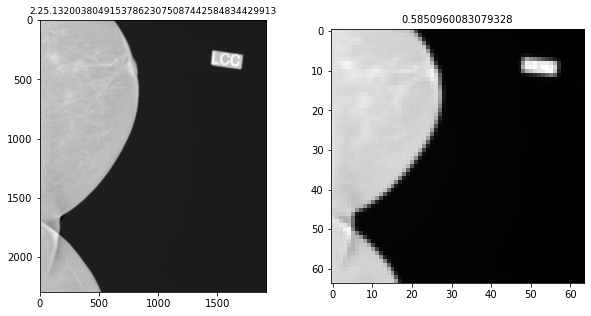

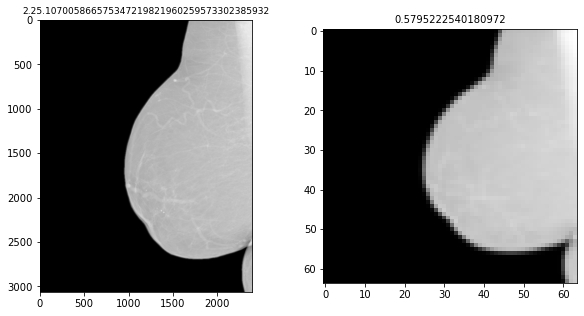

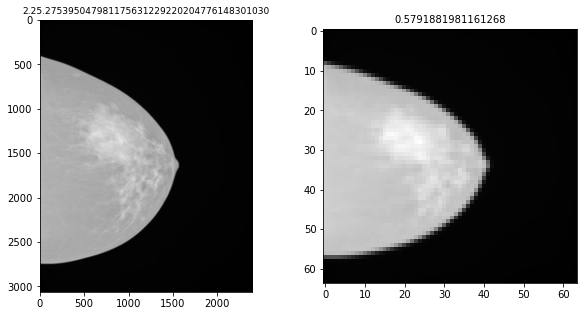

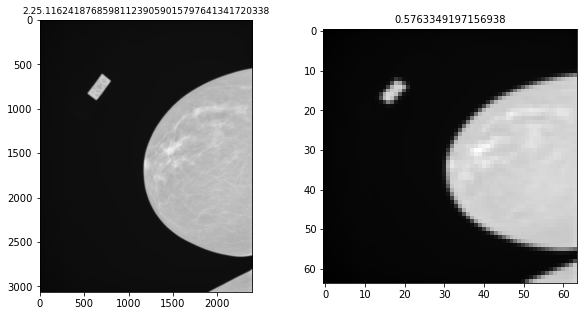

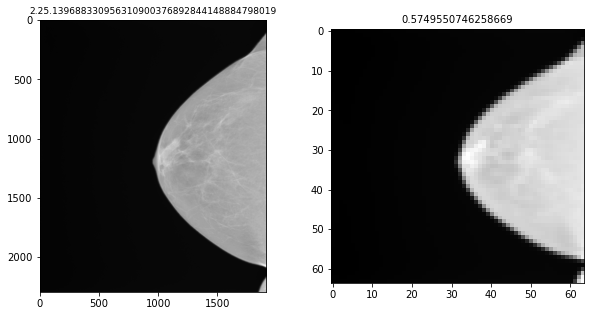

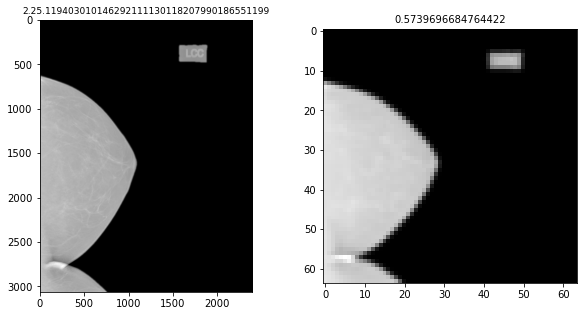

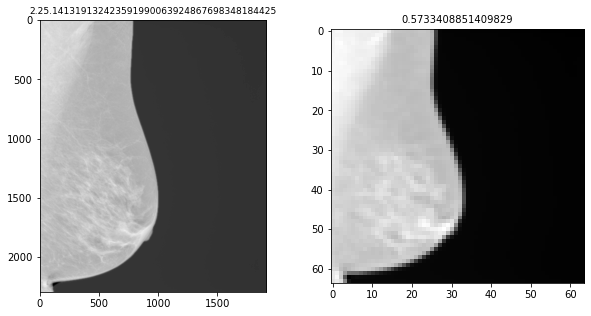

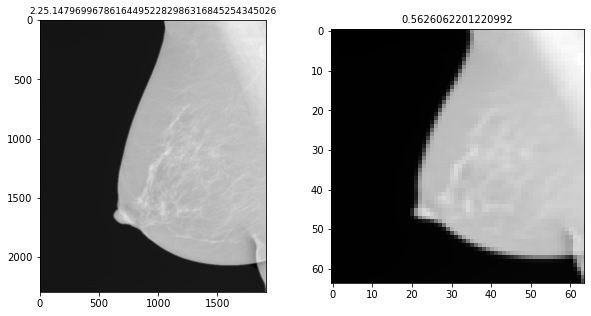

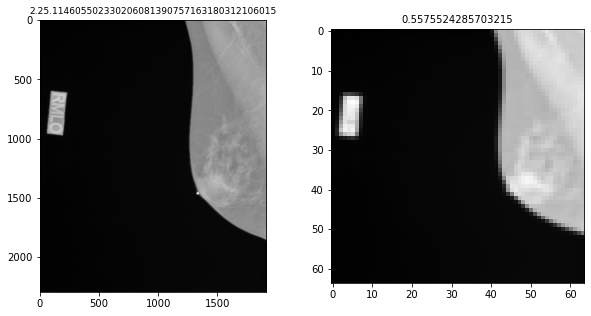

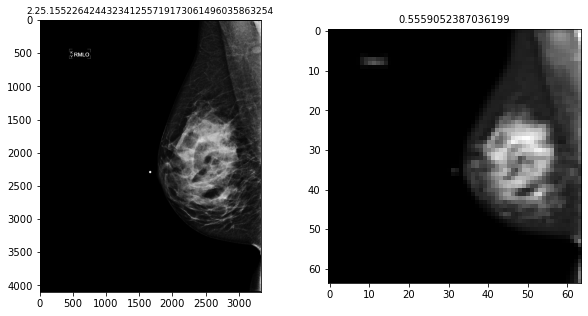

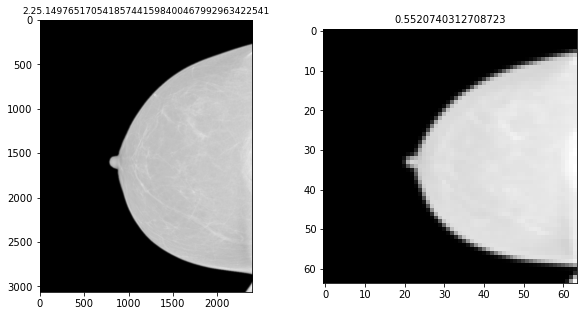

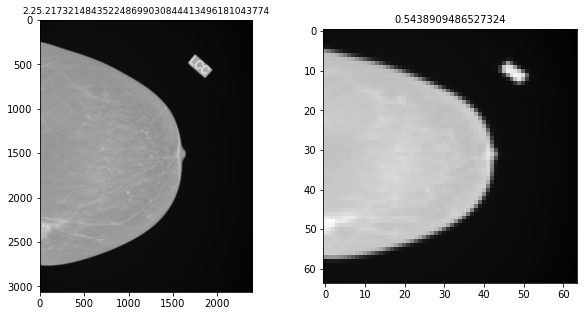

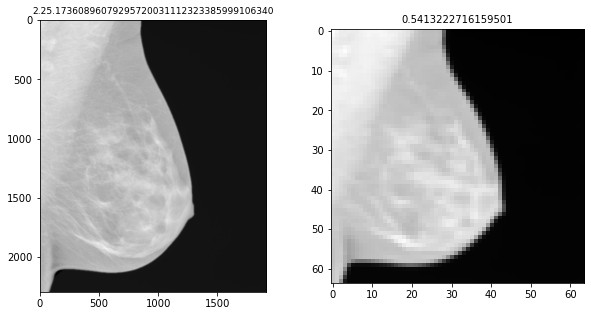

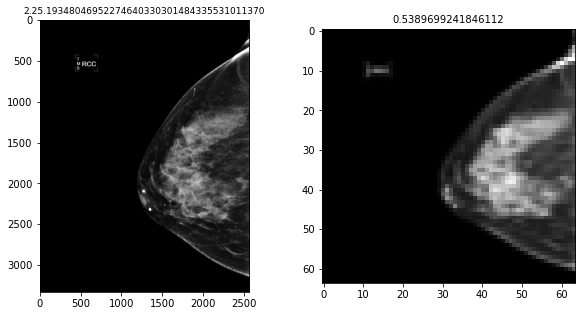

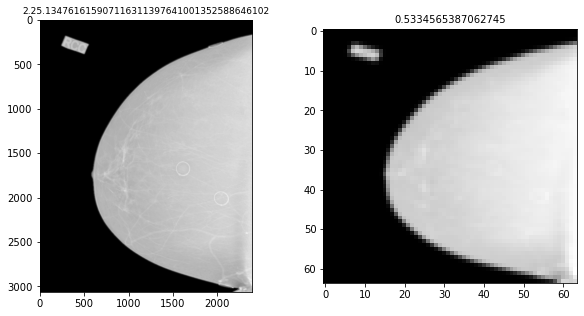

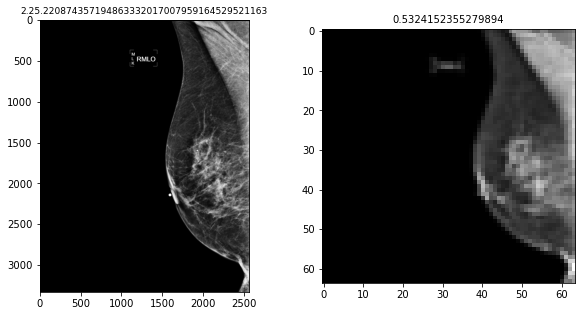

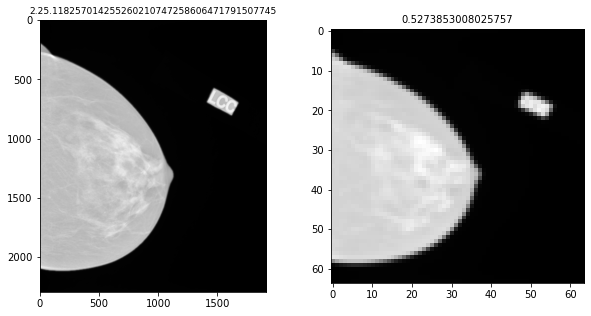

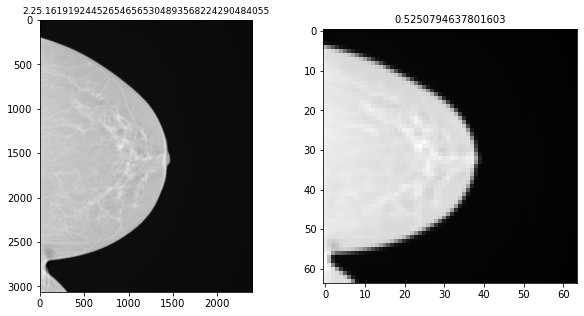

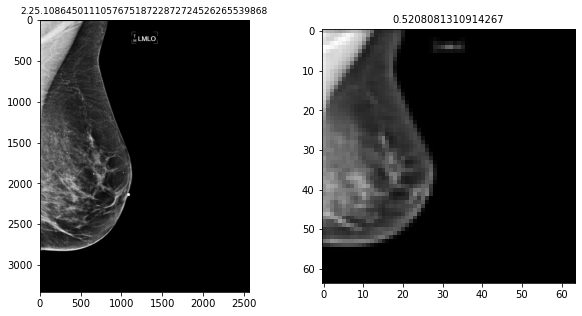

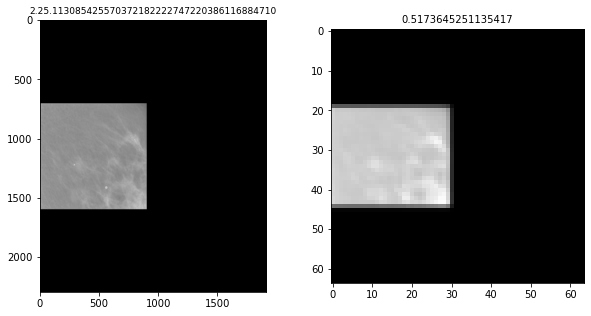

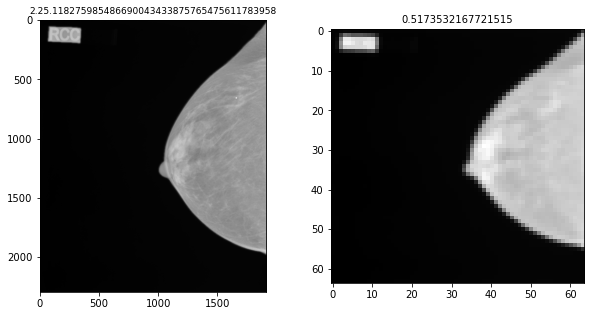

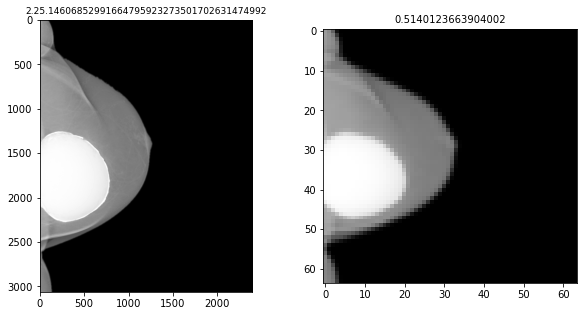

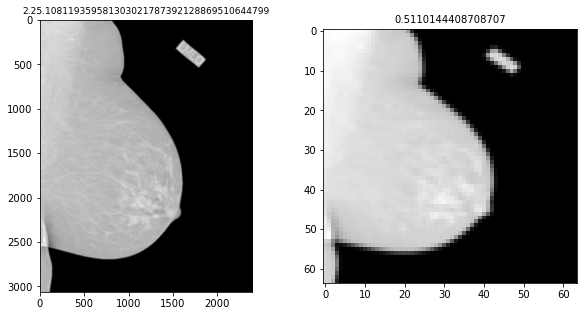

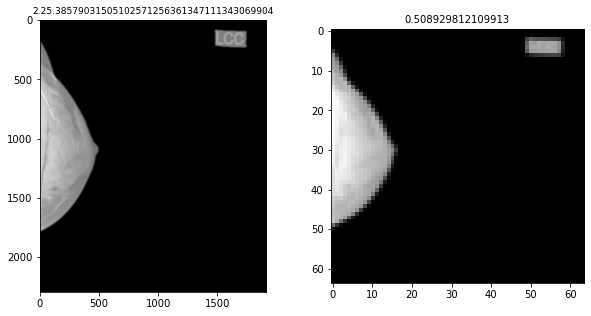

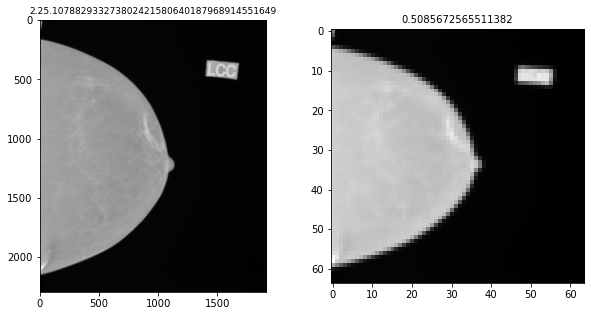

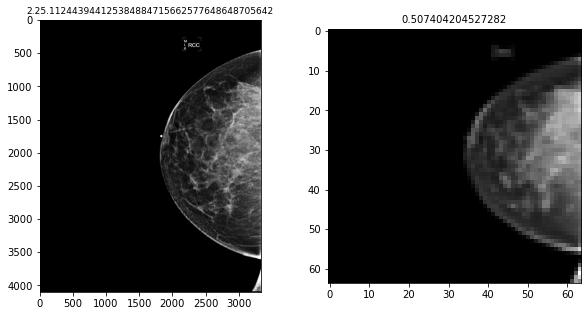

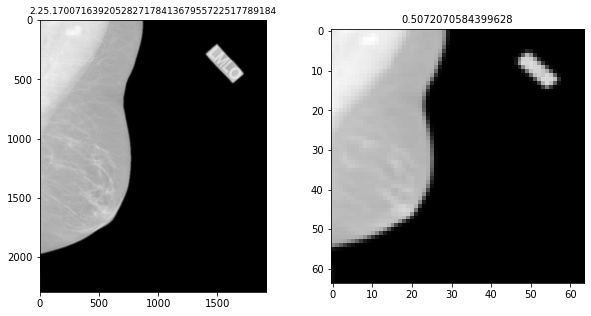

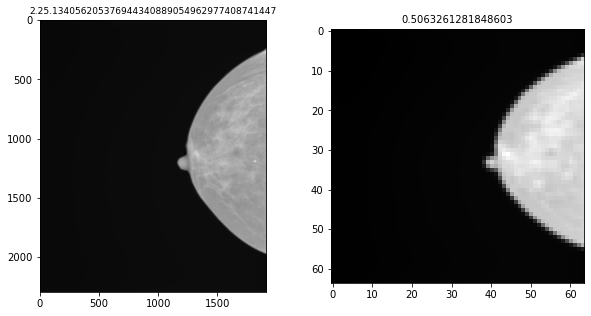

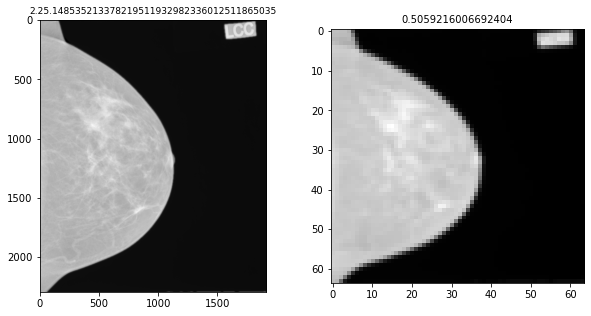

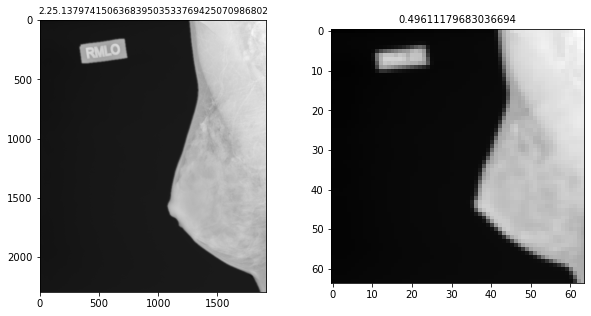

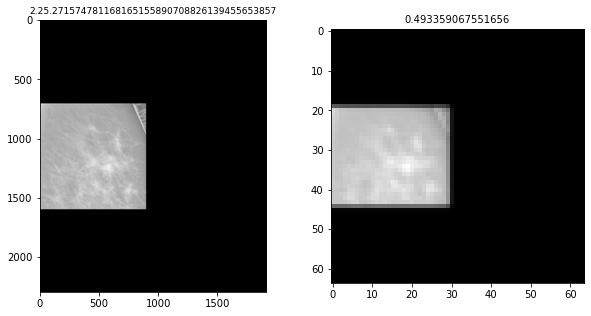

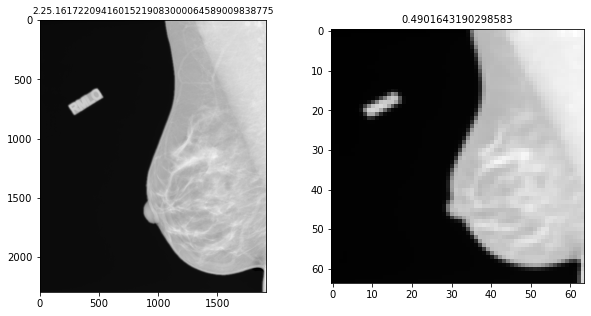

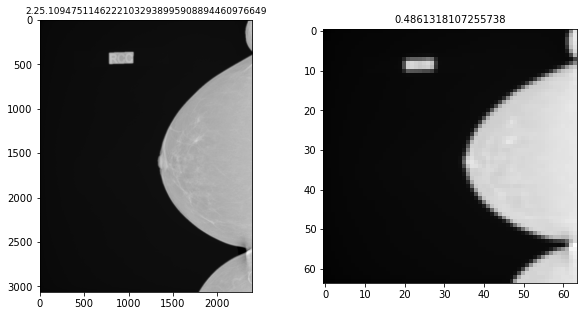

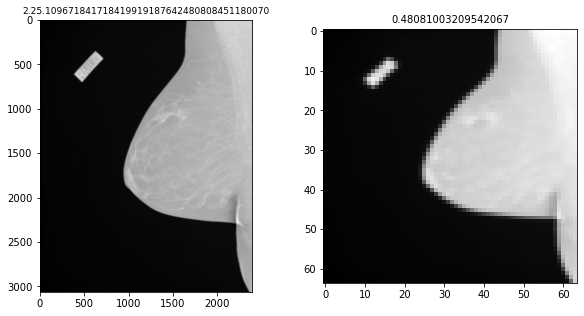

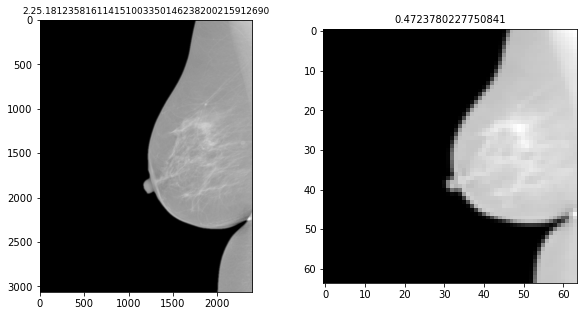

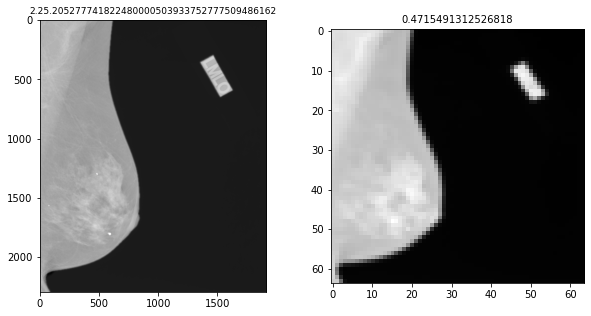

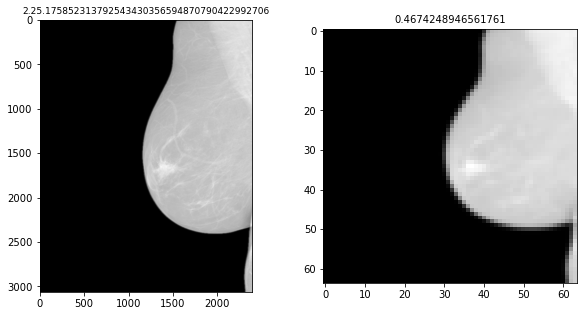

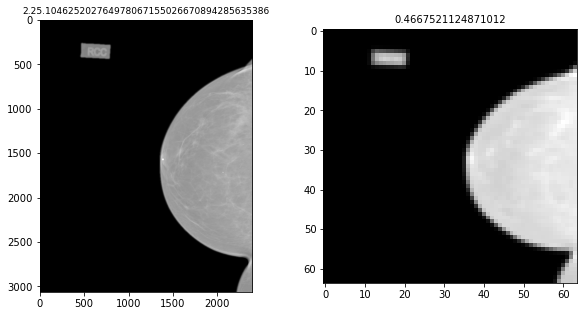

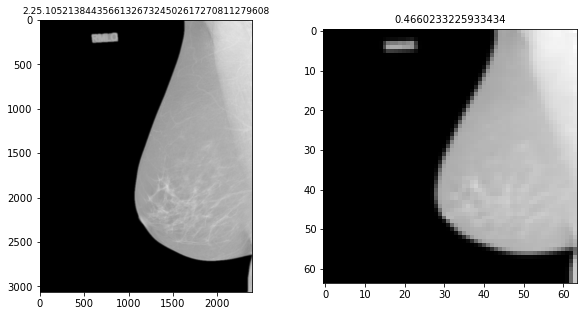

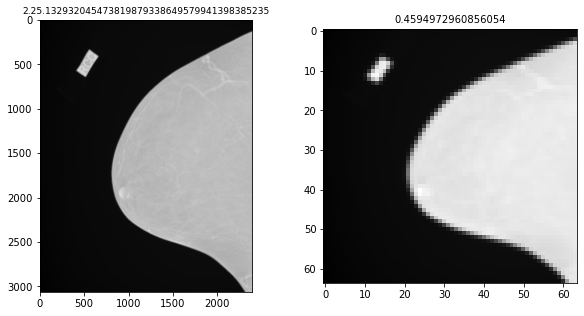

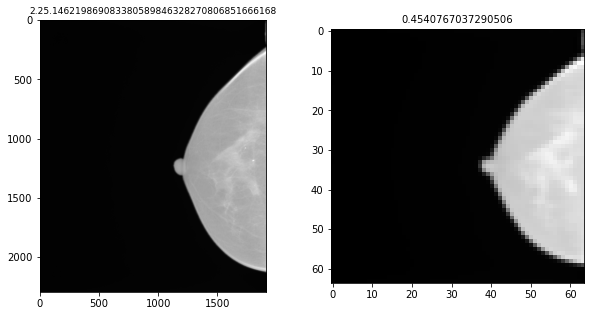

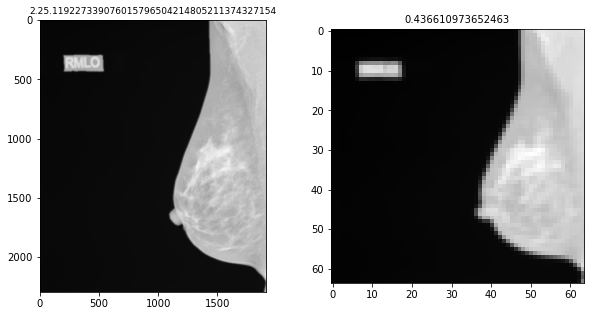

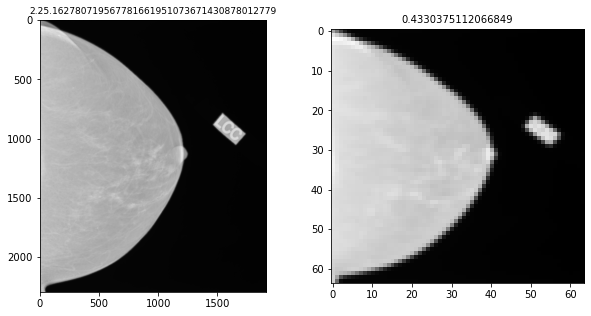

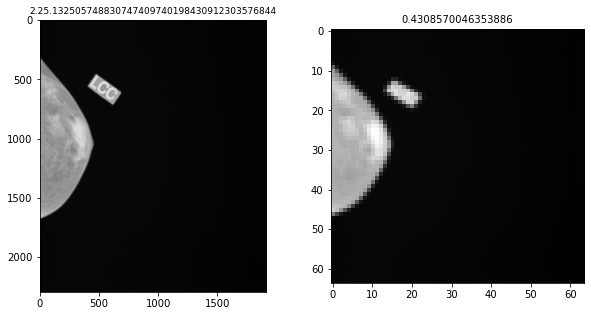

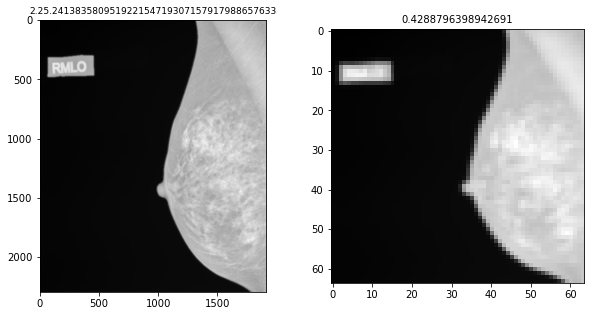

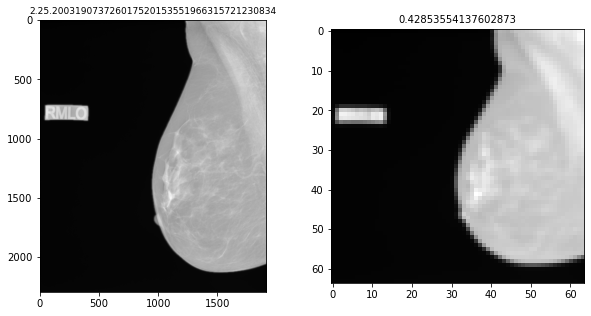

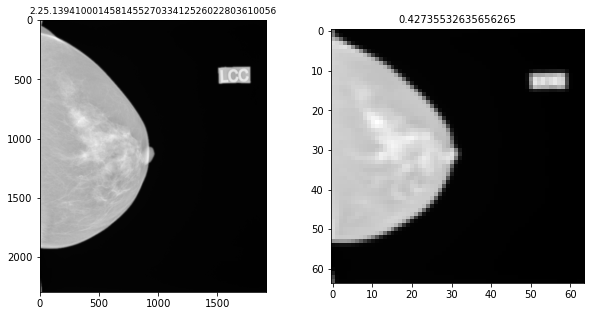

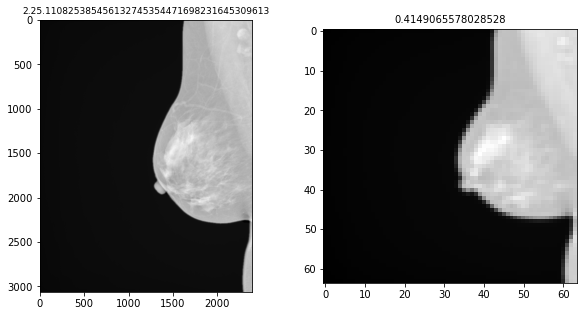

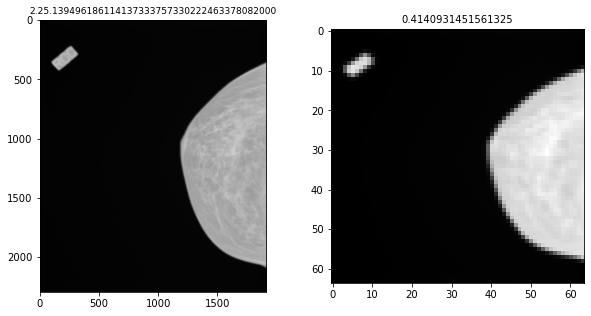

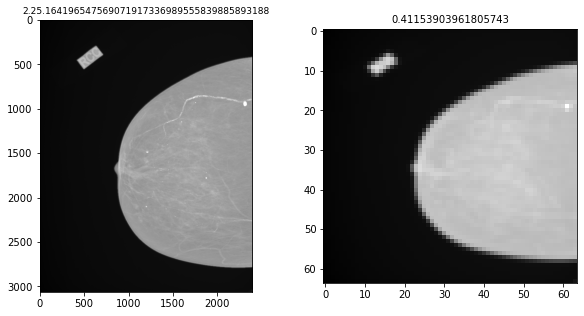

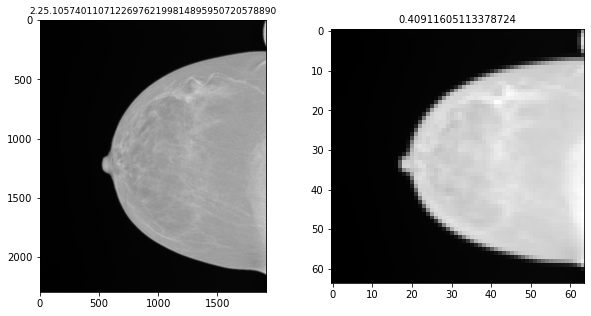

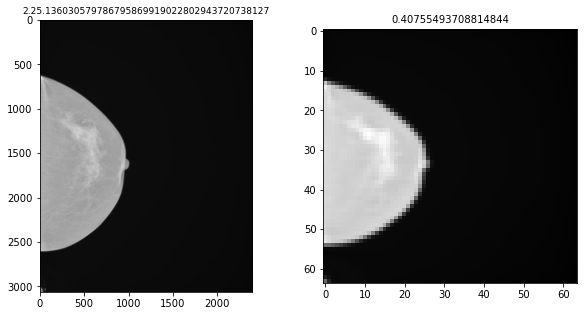

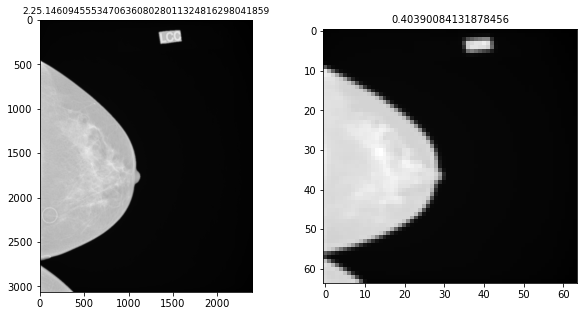

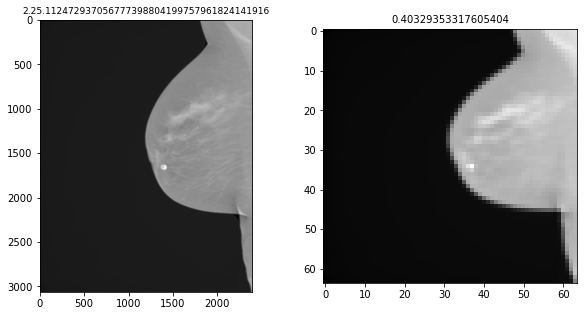

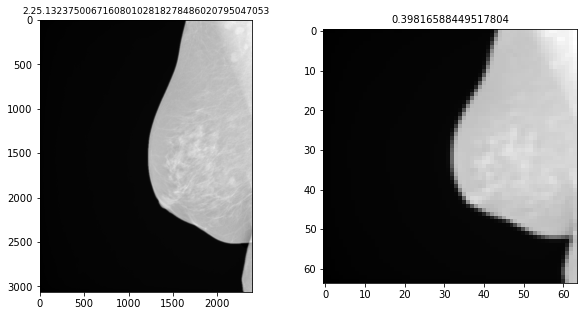

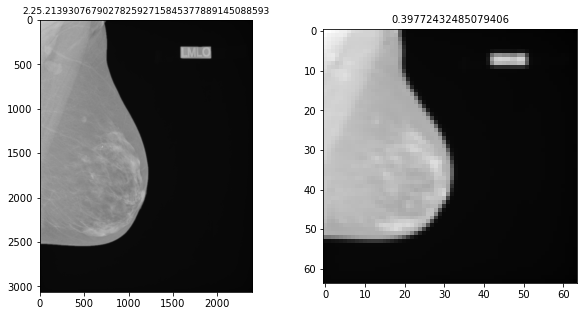

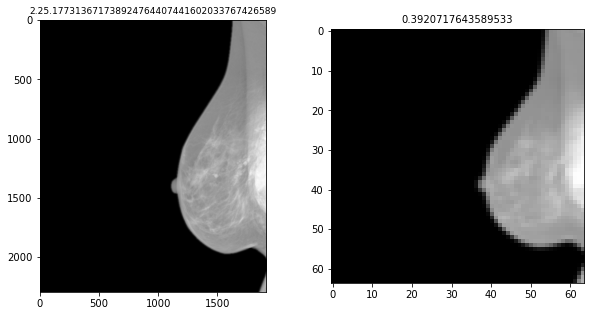

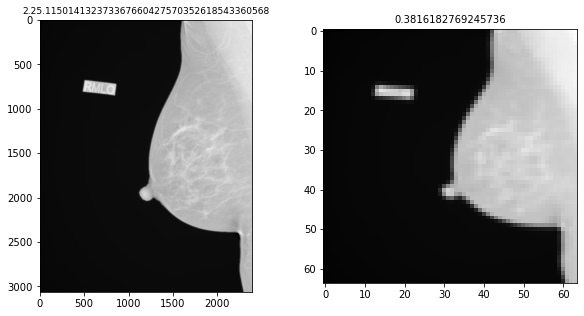

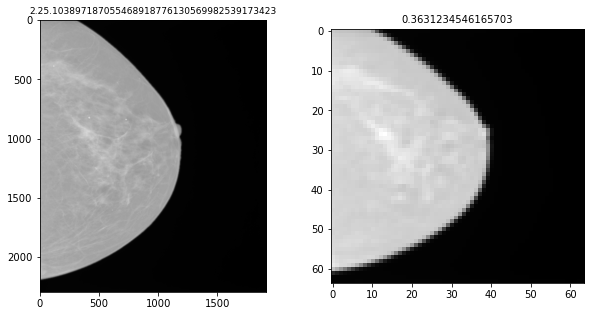

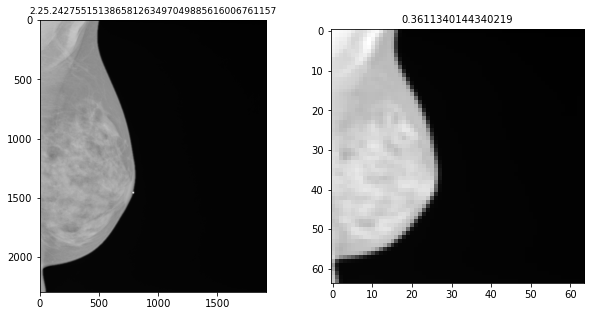

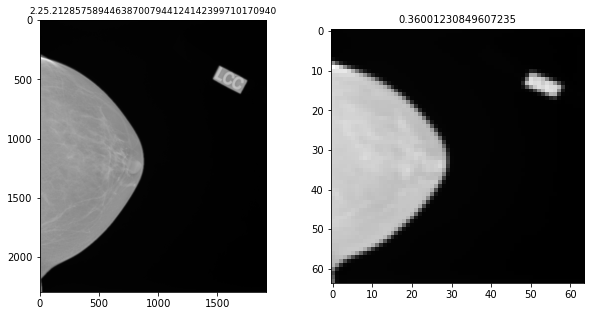

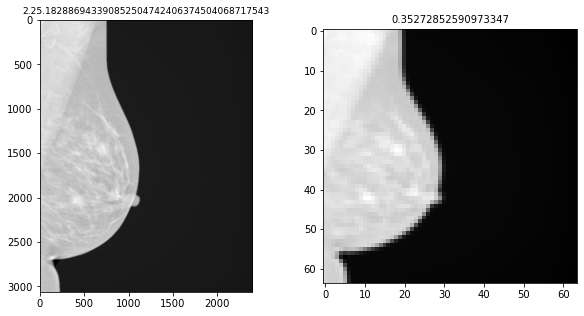

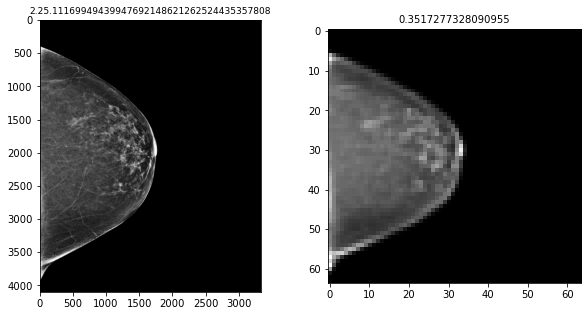

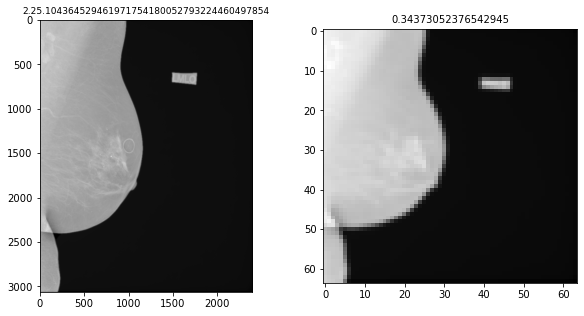

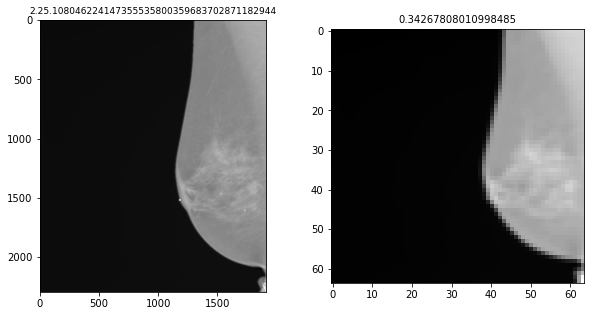

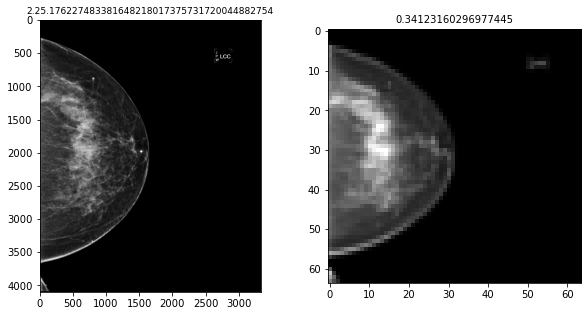

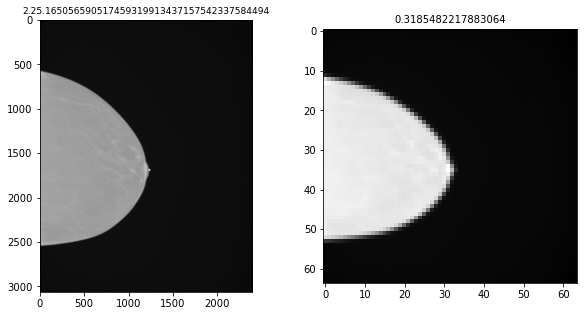

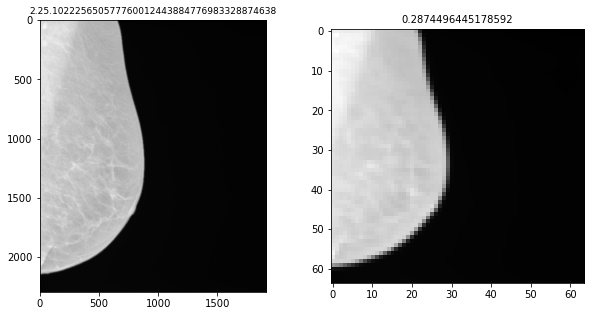

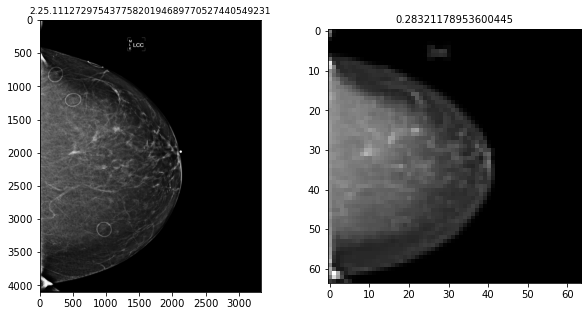

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='CBLOF')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])